##  3- Análisis gráfico global  y algunas estadísticas

En este  cuaderno vamos  ver algunas de las  funciones que dispone NILMTK para realizar un diagnóstico rápido del dataset.  Asimismo también se disponen de algunas funciones para obtener datos estadísticos basados en el uso y consumo de energía de los elementos.

En primer lugar debemos cargar las  librerías como pandas,matplotlib, nilmtk y SVG .

Asimismo realizaremos otros ajustes:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet, TimeFrame
import warnings
from IPython.display import SVG

warnings. filterwarnings("ignore")
plt.style.use('bmh')



Cargamos ahora el dataset y asociamos las etiquetas para los gráficos

In [2]:
#dataset de referencia 
deps = DataSet('iawe.h5')



elec=deps.buildings[1].elec # Todos los medidores

print (elec)


labels = pd.DataFrame({'Instances': list(range(1,13)),
                       'Meters': ['Medidor Princ.','M2', 'M.Fridge', 'M.AA', 'M.AA', 'M.Washing machine.','Computer','Clothes iron','unknown','tv','wet appliance','motor']})

Meters={}
#for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x] 
    
print(Meters)


#etiquetas eje x en algunos graficos
days = [  '2013-05-24 05:30:00+01:00','2013-09-18 08:40:00+01:00' ]

colors_1 = ['tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange','tab:green','tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange','tab:green']
colors_2 = [colors_1[0]]+colors_1[4:]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])
  ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])
  ElecMeter(instance=6, building=1, dataset='iAWE', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='iAWE', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='iAWE', appliances=[Appliance(type='clothes iron', instance=1)])
  ElecMeter(instance=9, building=1, dataset='iAWE', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=10, building=1, dataset='iAWE', appliances=[A

Ahora vamos a realizar los gráficos con  todos los datos de potencia de forma comprimida en un solo gráfico:

In [3]:
colors_2[:6]
t0 = '2013-05-24 05:30:00+01:00' #tiempo inicial
t1 = '2013-09-18 12:58:00+01:00' #tiempo final

Tambien podemos obtener el gráfico de la relación entre la señal agregada y la suma de las mediciones individuales de los dispositivos mediante una gráfica de área mediante el siguinte método  algo mas largo

In [4]:
elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11,12]).power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

Loading data for meter ElecMeterID(instance=12, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.


2013-05-24 10:00:00+05:30    627.230774
2013-05-24 10:01:00+05:30    637.520996
2013-05-24 10:02:00+05:30    550.206299
2013-05-24 10:03:00+05:30    517.920288
2013-05-24 10:04:00+05:30    633.477295
                                ...    
2013-09-18 08:36:00+05:30      1.316350
2013-09-18 08:37:00+05:30      1.309550
2013-09-18 08:38:00+05:30      1.296950
2013-09-18 08:39:00+05:30      1.303717
2013-09-18 08:40:00+05:30      1.316036
Freq: 60S, Name: (power, active), Length: 168401, dtype: float32

### Perfil de Voltaje

In [5]:
#V2=next(elec[2].load())['voltage']
V3=next(elec[3].load())['voltage']
V4=next(elec[4].load())['voltage']
V5=next(elec[5].load())['voltage']
V6=next(elec[6].load())['voltage']
V7=next(elec[7].load())['voltage']
V8=next(elec[8].load())['voltage']
V9=next(elec[9].load())['voltage']
V10=next(elec[10].load())['voltage']
V11=next(elec[11].load())['voltage']
#V12=next(elec[12].load())['voltage']


In [6]:
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'Fridge':    [round(V3.mean(),1), round(V3.mean(),1), round(V3.mean(),1)], #Voltaje fan
     'AACC':    [round(V4.max(),1),  round(V4.max(),1),  round(V4.max(),1)],  #Voltaje frezer
     'AACC':    [round(V5.min(),1),  round(V5.min(),1),  round(V5.min(),1)],  #Voltaje tv
     'Washing machine':    [round(V6.min(),1),  round(V6.min(),1),  round(V6.min(),1)],  #Voltaje freezer
     'Computer':    [round(V7.min(),1),  round(V7.min(),1),  round(V7.min(),1)],  #Voltaje freezer
     'Clothes iron':    [round(V8.min(),1),  round(V8.min(),1),  round(V8.min(),1)],  #Voltaje freezer
     'Unknown':    [round(V9.min(),1),  round(V9.min(),1),  round(V9.min(),1)],  #Voltaje freezer
     'Television':    [round(V10.min(),1),  round(V10.min(),1),  round(V10.min(),1)],  #Voltaje freezer
     'Wet appliance':    [round(V11.min(),1),  round(V11.min(),1),  round(V11.min(),1)]}  #Voltaje freezer
#    'Motor':    [round(V12.min(),1),  round(V12.min(),1),  round(V12.min(),1)]}  #Voltaje freezer



pd.DataFrame(d)

,Indicador,Fridge,AACC,Washing machine,Computer,Clothes iron,Unknown,Television,Wet appliance
0,Promedio,232.199997,0.0,189.0,0.0,0.3,186.199997,0.2,0.0
1,Máximo,232.199997,0.0,189.0,0.0,0.3,186.199997,0.2,0.0
2,Mínimo,232.199997,0.0,189.0,0.0,0.3,186.199997,0.2,0.0


## Gráfico del perfil de voltaje

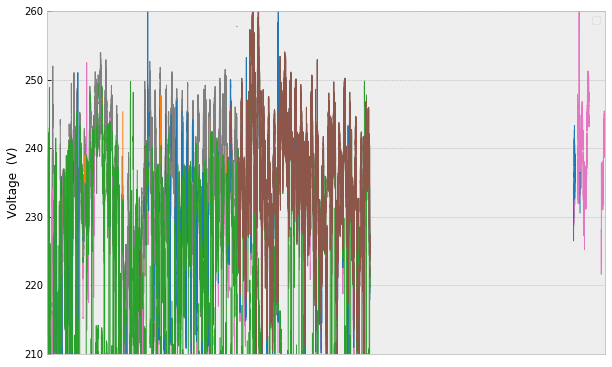

In [7]:
rcParams['figure.figsize'] = (10, 7)

#redimensina el gráfico para reducir tamaño


#V2=next(elec[2].load())['voltage']
V3=next(elec[3].load(sample_period=60))['voltage']
V4=next(elec[4].load(sample_period=60))['voltage']
V5=next(elec[5].load(sample_period=60))['voltage']
V6=next(elec[6].load(sample_period=60))['voltage']
V7=next(elec[7].load(sample_period=60))['voltage']
V8=next(elec[8].load(sample_period=60))['voltage']
V9=next(elec[9].load(sample_period=60))['voltage']
V10=next(elec[10].load(sample_period=60))['voltage']
V11=next(elec[11].load(sample_period=60))['voltage']
#V12=next(elec[12].load())['voltage']





fig, (ax1) = plt.subplots(1, 1, gridspec_kw={'hspace': 0.4})

ta = '2013-05-24 05:30:00+01:00' #tiempo inicial
tb = '2013-09-18 12:58:00+01:00' #tiempo final


V3[ta:tb].plot(ax=ax1, c='tab:gray', lw=1)
V4[ta:tb].plot(ax=ax1, c='tab:pink', lw=1)
V5[ta:tb].plot(ax=ax1, c='tab:blue', lw=1)
V6[ta:tb].plot(ax=ax1, c='tab:orange', lw=1)
V7[ta:tb].plot(ax=ax1, c='tab:green', lw=1)
V8[ta:tb].plot(ax=ax1, c='tab:green', lw=1)
V9[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)
V10[ta:tb].plot(ax=ax1, c='tab:green', lw=1)
V11[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)


ax1.legend(list(Meters.values())[1:8], loc='upper right')
ax1.set(ylim=(210,260))
ax1.set(ylabel='Voltage  (V)')
ax1.set(xticks=days[1:])


#guarda gráfico
plt.savefig('./data/images/2.8_voltage_profile.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Datos faltantes

Los datos faltantes, huecos o gaps están determinados por los metadatos de cada tipo de medidor, específicamente en el ajuste del parámetro max_sample_period. Este valor indica el tiempo máximo que se tolera entre mediciones sin que se considere que el medidor está apagado

In [8]:
elec[1].good_sections(full_results=True).combined() #secciones buenas Main_RST

[TimeFrame(start='2013-05-24 05:30:00+05:30', end='2013-05-24 07:13:35+05:30', empty=False),
 TimeFrame(start='2013-05-24 09:07:19+05:30', end='2013-05-25 12:07:19+05:30', empty=False),
 TimeFrame(start='2013-05-25 13:38:35+05:30', end='2013-05-25 14:08:06+05:30', empty=False),
 TimeFrame(start='2013-05-25 14:36:51+05:30', end='2013-05-25 18:06:43+05:30', empty=False),
 TimeFrame(start='2013-05-25 19:07:08+05:30', end='2013-05-26 00:56:38+05:30', empty=False),
 TimeFrame(start='2013-05-26 01:50:55+05:30', end='2013-05-26 15:55:34+05:30', empty=False),
 TimeFrame(start='2013-05-26 16:18:08+05:30', end='2013-05-26 23:37:08+05:30', empty=False),
 TimeFrame(start='2013-05-27 00:12:16+05:30', end='2013-05-27 11:02:20+05:30', empty=False),
 TimeFrame(start='2013-05-27 11:25:28+05:30', end='2013-05-27 18:13:53+05:30', empty=False),
 TimeFrame(start='2013-05-27 18:26:24+05:30', end='2013-05-27 18:45:21+05:30', empty=False),
 TimeFrame(start='2013-05-27 19:25:30+05:30', end='2013-05-28 00:21:33

Visualizar de manera gráfica los datos faltantes 

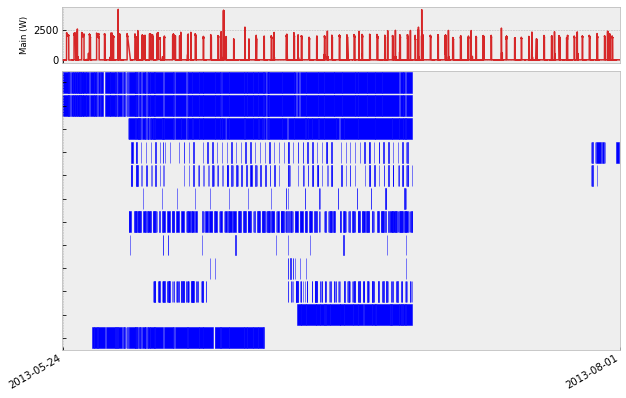

In [9]:
rcParams['figure.figsize'] = (10, 7)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios':[1,5]})

elec[1].power_series_all_data().plot(ax=ax1, c='tab:red', lw=1.5)
ax1.set_ylabel('Main (W)', fontsize=8.5)
ax1.minorticks_off()

elec.plot_good_sections(ax=ax2)
ax2.set_yticklabels(reversed(list(Meters.values())))
ax2.grid(axis='y')
ax2.set(xticks=days)
l=['2013-05-24','2013-08-01','2013-09-18']
ax2.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/2.9_good_sections.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Tasa de abandono y tiempo de funcionamiento

#### Tasa de abandono
Sin contar cuando el sistema no registra datos superando el tiempo máximo de muestreo, aunque también se perciben perdidas de datos debido al propio sistema de adquisición, lo cual se le llama abandono o dropout. 

La tasa de abandono (dropout rate) es por tanto  un número entre 0 y 1 que especifica la proporción de muestras faltantes. Una tasa de abandono de 0 significa que no faltan muestras y un valor de 1 significaría que faltan todas las muestras (100%). 

#### Tiempo de funcionamiento
El tiempo de funcionamiento calculado estará condicionado al parámetro max_sample_period de cada medidor especificado en los metadatos. Si no se han registrado datos pasado  ese tiempo, se considera el medidor como apagado.

In [10]:
a=[]; b=[]; c=[]
for meter, name in Meters.items():
    a.append(name)
    b.append(str(meter.uptime())) #tiempo de funcionamiento
    c.append(round(meter.dropout_rate()*100,1)) #tasa de abandono

a.append('Total')
b.append(str(elec.uptime()))
c.append(round(elec.dropout_rate()*100,1))
    
df=pd.DataFrame(data=[b,c], columns=a, index=['Uptime','Dropout Rate']).transpose()
df

Calculating dropout_rate for ElecMeterID(instance=12, building=1, dataset='iAWE') ...   

,Uptime,Dropout Rate
Total,69 days 00:55:20,13.3


### Registro de actividad

Periodos de tiempo en que se registra una medición superior a un umbral definido (incluyendo peaks).

In [44]:
 labels = pd.DataFrame({'Instances': list(range(1,13)),
                       'Meters': ['Medidor Princ.','M2', 'M.Fridge', 'M.AA', 'M.AA', 'M.Washing machine.','Computer','Clothes iron','unknown','tv','wet appliance','motor']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

Color de fondo después:  (1.0, 1.0, 1.0, 1.0)


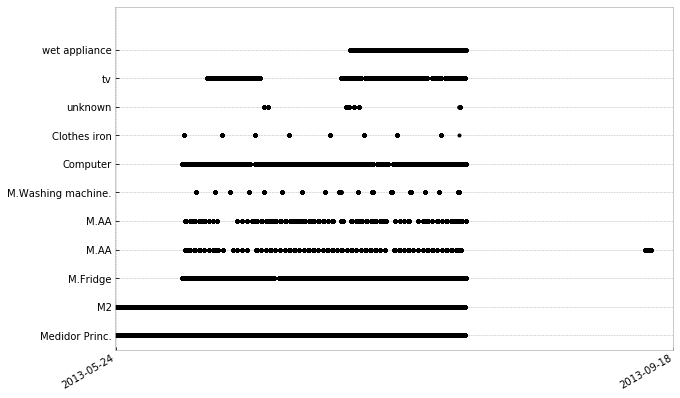

In [45]:
rcParams['figure.figsize'] = (10, 7)

Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
ax=Devices.plot_when_on(on_power_threshold=10) #umbral de 80 W

#etiquetas
ax.set_yticklabels(list(Meters.values())[0:11])
ax.set(xticks=days)

#guarda gráfico
plt.savefig('./data/images/2.10_On_power1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('./data/images/2.10_On_power1.png', bbox_inches='tight', transparent=True, dpi=1200)
#formatos savefig: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz, evitar guardar .svg por el tamaño del archivo (50Mb)
plt.show()
pass


### Graficos de Actividad por dispositivo y por día

Veamos ahora el gráfico por Actividad para cada  dispositivo por día.

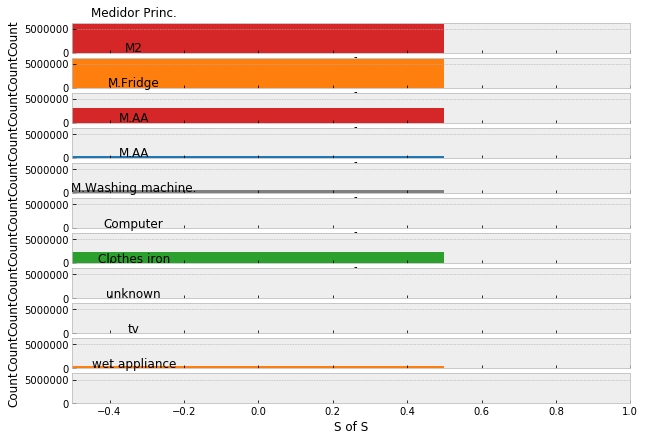

In [42]:
colors_1 = ['tab:red','tab:orange','tab:red','tab:blue','tab:grey','tab:pink','tab:green','tab:blue','tab:gray','tab:orange','tab:green','tab:yellow','tab:black','tab:purple']
#colors_1
#rcParams['figure.figsize'] = (12, 10)
fig, ((ax1, ax2,ax3, ax4,ax5, ax6,ax7,ax8,ax9,ax10,ax11)) = plt.subplots(11, 1, sharex=True, sharey=True, 
                                                                 gridspec_kw={'hspace': 0.17, 'wspace': 0.09})

m=0



for ax in fig.get_axes(): 
    list(Meters)[m].plot_activity_histogram(ax=ax, period='S', #periodo en segundos
                                            bin_duration='S', #duración en segundos
                                            on_power_threshold=10, #umbral de 10w
                                            plot_kwargs={'color':colors_1[m]})
    #labels
    ttl=ax.set_title(labels['Meters'][m], fontsize=12)
    ttl.set_position([.11, 1])
    m=m+1
    ax.grid(axis='x')


#guarda gráfico
plt.savefig('./data/images/2.12_Activity_histogram.svg',bbox_inches='tight', transparent=True)
plt.show()
pass

### Mapa de calor con las mediciones de potencia activa del medidor Main 

Ahora veamos una representación de las potencias activas para el medidor principal para el periodo de una semana.

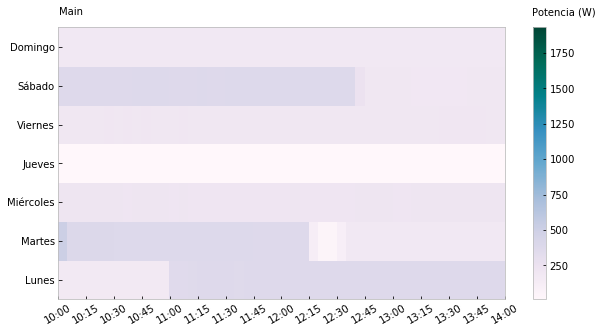

In [13]:
import numpy as np
import pandas as pd

d=elec[1].power_series_all_data(sample_period=60, resample_kwargs={'how': 'mean'}).to_frame()
d.fillna(0,inplace=True)

#tomamos la potencia activa como referencia
d.columns=['active']

#indices para la consulta
d['weekday']=d.index.weekday
d['time']=d.index.time

matrix=d.groupby(['weekday','time']).active.mean().unstack().values

plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.pcolor(matrix,cmap='PuBuGn')
plt.xlim([0,48])
ax.set_xticks(np.arange(0,49,3))
ax.set_xticklabels(['10:00','10:15','10:30','10:45','11:00',
                    '11:15','11:30','11:45','12:00','12:15','12:30','12:45','13:00','13:15','13:30','13:45','14:00'],rotation=30)
ax.set_yticks(np.arange(0.5,7))
ax.set_yticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.colorbar()
ax.text(0.1, 7.4, 'Main', ha='left', va='center')
ax.text(51, 7.4, 'Potencia (W)', ha='left', va='center') 

plt.savefig('./data/images/2.13_Use_power1.svg', bbox_inches='tight', transparent=True)
plt.show()

### Estadísticas de energía

Cálculo de la energía total, es decir , las potencias activa, reactiva y aparente.

In [14]:
elec[1].total_energy()

active      360.497106
apparent    386.912461
reactive     30.660551
dtype: float64

Cálculo de la energía (potencia activa) por medidores

In [15]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='H').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='W'

#energía por submedidor kwH total
#d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'
d3=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'


df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Hora','kWh Dia.','Total kWh']
df

12/12 ElecMeter(instance=12, building=1, dataset='iAWE', appliances=[Appliance(type='motor', instance=1)])nce=1)])

,kWh Hora,kWh Dia.,Total kWh
Medidor Princ.,0.20,4.89,4.89
M2,0.57,13.65,13.65
M.Fridge,0.06,1.39,1.39
M.AA,0.08,1.99,1.99
M.AA,0.09,2.08,2.08
M.Washing machine.,0.00,0.04,0.04
Computer,0.02,0.41,0.41
Clothes iron,0.00,0.02,0.02
unknown,0.00,0.02,0.02
tv,0.01,0.21,0.21


### Proporción de energía submedida respecto a la medición agregada.

Se usa la función original  proportion_of_energy_submetered que se ha modificado para representar correctamente las etiquetas, dando paso a proportion_of_energy_submetered_2 en  donde se pueden especificar por separado el medidor principal y los submedidores. Esta funcion se integra en metergroup.py  que almacenamos en users\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

In [16]:
Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='active')

Running MeterGroup.proportion_of_energy_submetered...


5.18767339711525

### Síntesis del dataset
NILMTK ofrece una función que permite obtener un resumen de un MeterGroup en base a los medidores que contiene. Esta función engloba varias de las funciones que se han ejecutado anteriormente.

In [17]:
elec.describe(elec.select(instance=[2,3,4,5,6,7,8,9,10,11]))

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=12, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=12, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=12, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='iAWE') ...    

total_n_meters                                                                               12
total_n_site_meters                                                                           2
correlation_of_sum_of_submeters_with_mains                                             0.838585
proportion_of_energy_submetered                                                        0.372128
dropout_rates_ignoring_gaps                   min=0.009995750283066363, mean=0.1334828025500...
mains_sample_period                                                                           1
submeter_sample_period                                                                        6
timeframe                                     start=2013-05-24 05:30:00+05:30, end=2013-09-1...
total_duration                                                                117 days 03:10:55
mains_uptime                                                                   69 days 00:55:20
proportion_uptime                       